In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
traindf = pd.read_csv(r"/content/drive/MyDrive/NLP/DATASETS/semEval2018/2018-E-c-En-train.txt",encoding='utf-8',sep="\t")
#traindf = pd.read_csv(r"/content/2018-E-c-En-train.txt",encoding='utf-8',sep="\t")

,Classes,Count
0,anger,2544
1,anticipation,978
2,disgust,2602
3,fear,1242
4,joy,2477
5,love,700
6,optimism,1984
7,pessimism,795
8,sadness,2008
9,surprise,361


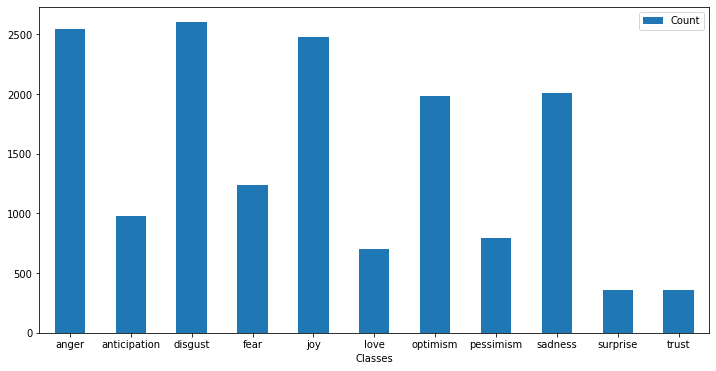

In [ ]:
temp_df = traindf.drop(columns=["ID","Tweet"]) 
count_classes = list(temp_df.sum(axis=0))
classes = list(temp_df.columns.values.tolist())
list_of_tuples = list(zip(classes, count_classes))
df = pd.DataFrame(list_of_tuples, columns = ['Classes', 'Count'])
ax = df.plot.bar(x='Classes', y='Count', rot=0, figsize=(12, 6))
df

In [ ]:
traindf

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,2017-En-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1
1,2017-En-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0
2,2017-En-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0
3,2017-En-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0
4,2017-En-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,2017-En-21383,@nicky57672 Hi! We are working towards your hi...,0,0,0,0,0,0,0,0,0,0,0
6834,2017-En-41441,@andreamitchell said @berniesanders not only d...,0,1,0,0,0,0,0,0,0,1,0
6835,2017-En-10886,@isthataspider @dhodgs i will fight this guy! ...,1,0,1,0,0,0,0,1,0,0,0
6836,2017-En-40662,i wonder how a guy can broke his penis while h...,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
temp=traindf.sum(axis = 1, skipna = True)
traindf['sum']=temp
traindf

,ID,Tweet,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,sum
0,2017-En-21441,“Worry is a down payment on a problem you may ...,0,1,0,0,0,0,1,0,0,0,1,3
1,2017-En-31535,Whatever you decide to do make sure it makes y...,0,0,0,0,1,1,1,0,0,0,0,3
2,2017-En-21068,@Max_Kellerman it also helps that the majorit...,1,0,1,0,1,0,1,0,0,0,0,4
3,2017-En-31436,Accept the challenges so that you can literall...,0,0,0,0,1,0,1,0,0,0,0,2
4,2017-En-22195,My roommate: it's okay that we can't spell bec...,1,0,1,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,2017-En-21383,@nicky57672 Hi! We are working towards your hi...,0,0,0,0,0,0,0,0,0,0,0,0
6834,2017-En-41441,@andreamitchell said @berniesanders not only d...,0,1,0,0,0,0,0,0,0,1,0,2
6835,2017-En-10886,@isthataspider @dhodgs i will fight this guy! ...,1,0,1,0,0,0,0,1,0,0,0,3
6836,2017-En-40662,i wonder how a guy can broke his penis while h...,0,0,0,0,0,0,0,0,0,1,0,1


In [ ]:
sum1=traindf[traindf['sum'] >= 1]
sum2=traindf[traindf['sum'] >= 2]
sum3=traindf[traindf['sum'] >= 3]

sum1=sum1.drop(columns=['sum'])
sum2=sum2.drop(columns=['sum'])
sum3=sum3.drop(columns=['sum'])

In [ ]:
from sklearn.model_selection import train_test_split

train1, test1 = train_test_split(sum1, test_size=0.2)
train2, test2 = train_test_split(sum1, test_size=0.2)
train3, test3 = train_test_split(sum1, test_size=0.2)

In [ ]:
train1.to_csv('train1.txt',sep='\t', index=False, encoding='utf-8')
train2.to_csv('train2.txt',sep='\t', index=False, encoding='utf-8')
train3.to_csv('train3.txt',sep='\t', index=False, encoding='utf-8')

test1.to_csv('test1.txt',sep='\t', index=False)
test2.to_csv('test2.txt',sep='\t', index=False)
test3.to_csv('test3.txt',sep='\t', index=False)

In [ ]:
temp = traindf['Tweet']

temp = temp[0:10]
for i in temp:
  print(i)
  print("------")

“Worry is a down payment on a problem you may never have'.  Joyce Meyer.  #motivation #leadership #worry
------
Whatever you decide to do make sure it makes you #happy.
------
@Max_Kellerman  it also helps that the majority of NFL coaching is inept. Some of Bill O'Brien's play calling was wow, ! #GOPATS
------
Accept the challenges so that you can literally even feel the exhilaration of victory.' -- George S. Patton 🐶
------
My roommate: it's okay that we can't spell because we have autocorrect. #terrible #firstworldprobs
------
No but that's so cute. Atsu was probably shy about photos before but cherry helped her out uwu
------
Do you think humans have the sense for recognizing impending doom? 
------
Rooneys fucking untouchable isn't he? Been fucking dreadful again, depay has looked decent(ish)tonight
------
it's pretty depressing when u hit pan on ur favourite highlighter
------
@BossUpJaee but your pussy was weak from what I heard so stfu up to me bitch . You got to threaten him th

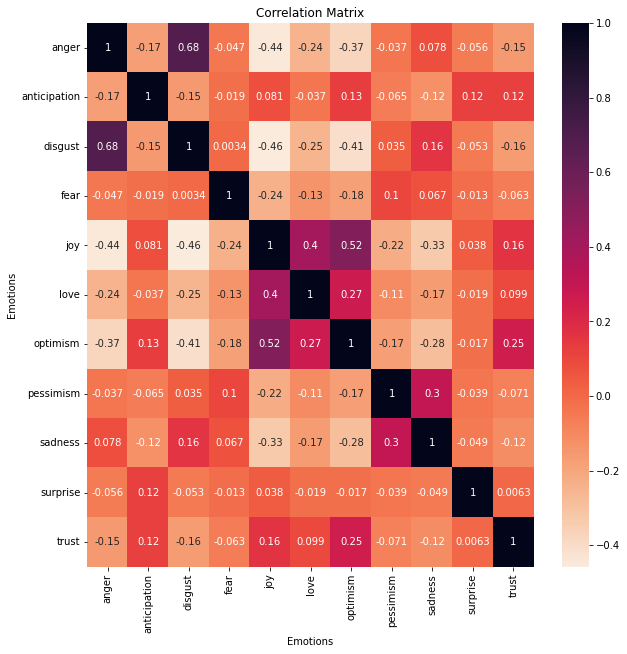

                 anger  anticipation   disgust  ...   sadness  surprise     trust
anger         1.000000     -0.170124  0.682969  ...  0.078355 -0.055887 -0.150728
anticipation -0.170124      1.000000 -0.152412  ... -0.123996  0.118370  0.123825
disgust       0.682969     -0.152412  1.000000  ...  0.159333 -0.053027 -0.162280
fear         -0.047142     -0.019108  0.003432  ...  0.066865 -0.012839 -0.062824
joy          -0.442866      0.081457 -0.457816  ... -0.330276  0.038412  0.163697
love         -0.242966     -0.037367 -0.249769  ... -0.166897 -0.019320  0.098579
optimism     -0.374092      0.130001 -0.407485  ... -0.281325 -0.016920  0.252666
pessimism    -0.036596     -0.064773  0.035226  ...  0.304080 -0.038704 -0.070771
sadness       0.078355     -0.123996  0.159333  ...  1.000000 -0.048834 -0.115241
surprise     -0.055887      0.118370 -0.053027  ... -0.048834  1.000000  0.006329
trust        -0.150728      0.123825 -0.162280  ... -0.115241  0.006329  1.000000

[11 rows x 11 c

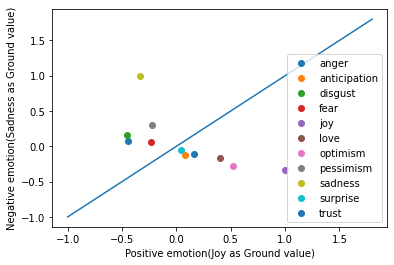

In [ ]:
import seaborn as sn
emotions = traindf.drop(columns=['ID','Tweet'])
corr_matrix = emotions.corr()
#cm = pd.DataFrame(corr_matrix)
#ds_cm = pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sn.heatmap(corr_matrix, annot=True, cmap='rocket_r',)
plt.xlabel('Emotions')
plt.ylabel('Emotions')
plt.title('Correlation Matrix') 
plt.show()
print(corr_matrix)

x = corr_matrix["joy"]
y = corr_matrix["sadness"]

import matplotlib.pyplot as plt
x_1 =np.arange(-1,2,.2)
y_1= x_1
plt.plot(x_1,y_1)
for i in range(len(x)):
  label = corr_matrix.columns[i]
  plt.scatter(x[i],y[i],label = label)
  plt.legend()
  plt.xlabel('Positive emotion(Joy as Ground value)')
  plt.ylabel('Negative emotion(Sadness as Ground value)')

plt.show()



In [ ]:
plt.figure()
a = corr_matrix["joy"]
plt.hlines(1,1,20)  # Draw a horizontal line
plt.eventplot(a, orientation='horizontal', colors='b')
plt.axis('off')
plt.show()

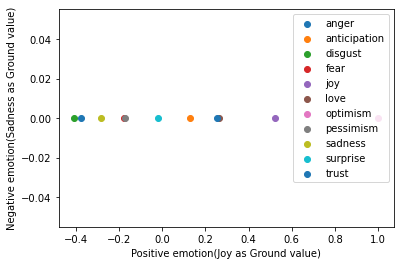

In [ ]:
for i in range(len(x)):
  label = corr_matrix.columns[i]
  plt.scatter(x[i],0,label = label)
  plt.legend()
  plt.xlabel('Positive emotion(Joy as Ground value)')
  plt.ylabel('Negative emotion(Sadness as Ground value)')

In [ ]:
anger
disgust
fear
pessimism
sadness
joy
love
optimism
anticipation
surprise
trust